# Постановка задачи

В данной работе, решается задача рекомендации книги читателю. Для этого, были использованы методы KMeans, DBSCAN и Agglomerative Clustering на основе характеристик книг.

Известные характеристики:
  * id книги
  * Название
  * Афтор
  * Рейтинг книги
  * Язык на котором была написана книга
  * Количество страниц
  * Дата публикации
  * и др.

In [25]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('/content/kaggle/books.csv', on_bad_lines='skip')

# Исправление названия столбца
df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)

# Проверка наличия всех столбцов
print(df.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [26]:
# Преобразование типов к числовым
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')
df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce')
df['text_reviews_count'] = pd.to_numeric(df['text_reviews_count'], errors='coerce')

# Удаление дубликатов
df = df.drop_duplicates()

# Удаление неинформативных признаков
df = df.drop(columns=['bookID', 'title', 'authors', 'isbn', 'isbn13', 'language_code', 'publication_date', 'publisher'])

# Проверка данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      11123 non-null  float64
 1   num_pages           11123 non-null  int64  
 2   ratings_count       11123 non-null  int64  
 3   text_reviews_count  11123 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 347.7 KB


In [27]:
# Дискретизация average_rating
bins = [0, 2, 4, 5]  # Пример разбиения на 3 категории: низкий, средний, высокий рейтинг
labels = [0, 1, 2]
df['average_rating_binned'] = pd.cut(df['average_rating'], bins=bins, labels=labels, include_lowest=True)

# Преобразование типов к числовым
df['average_rating_binned'] = df['average_rating_binned'].astype(int)

# Удаление неинформативных признаков
df = df.drop(columns=['average_rating'])

# Проверка данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   num_pages              11123 non-null  int64
 1   ratings_count          11123 non-null  int64
 2   text_reviews_count     11123 non-null  int64
 3   average_rating_binned  11123 non-null  int64
dtypes: int64(4)
memory usage: 347.7 KB


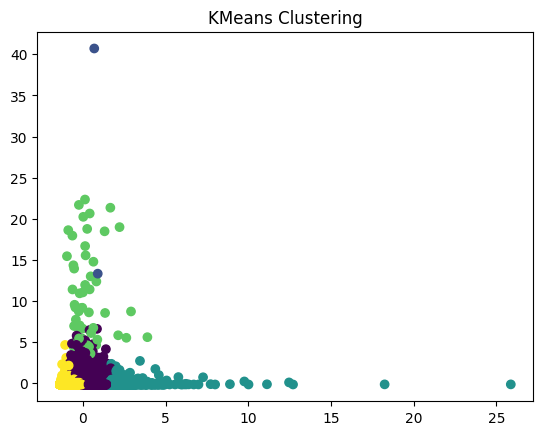

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['average_rating_binned']))

# Применение KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Визуализация результатов
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.show()


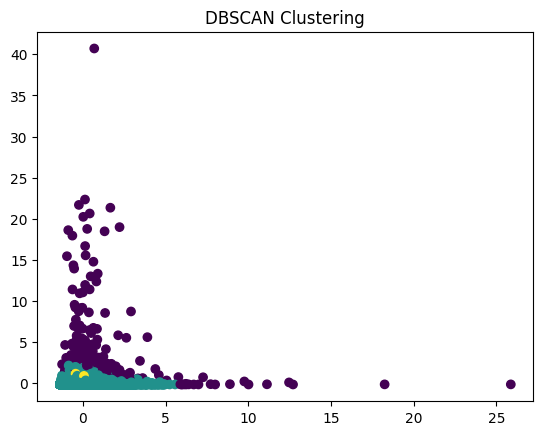

In [36]:
from sklearn.cluster import DBSCAN

# Применение DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Визуализация результатов
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


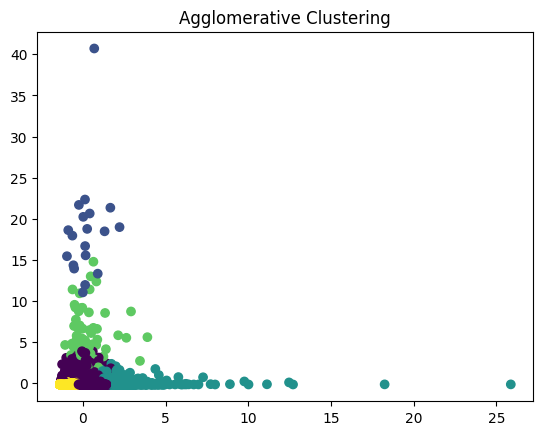

In [34]:
from sklearn.cluster import AgglomerativeClustering

# Применение Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Визуализация результатов
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


In [37]:
from sklearn.metrics import adjusted_rand_score

# Истинные метки (целевая метка y)
y_true = df['average_rating_binned']

# Сравнение результатов
kmeans_ari = adjusted_rand_score(y_true, kmeans_labels)
dbscan_ari = adjusted_rand_score(y_true, dbscan_labels)
agg_ari = adjusted_rand_score(y_true, agg_labels)

print(f'Adjusted Rand Index for KMeans: {kmeans_ari}')
print(f'Adjusted Rand Index for DBSCAN: {dbscan_ari}')
print(f'Adjusted Rand Index for Agglomerative Clustering: {agg_ari}')

Adjusted Rand Index for KMeans: 0.01378691135869372
Adjusted Rand Index for DBSCAN: 0.004719690133188135
Adjusted Rand Index for Agglomerative Clustering: 0.013151853305350129


На основе проведенного анализа кластеризации книг с использованием методов KMeans, DBSCAN и Agglomerative Clustering можно сделать следующие выводы:

1. KMeans: Показал наилучший результат по метрике Adjusted Rand Index (ARI) среди всех рассмотренных методов, что указывает на его эффективность в кластеризации данных с четкими границами между кластерами.

2. DBSCAN: Показал наименьший ARI, что может свидетельствовать о том, что данные не имеют четко выраженных кластеров произвольной формы или что параметры eps и min_samples были выбраны неоптимально.

3. Agglomerative Clustering: Показал результат, близкий к KMeans, что указывает на его потенциал в кластеризации данных с иерархической структурой.

В целом, метод KMeans оказался наиболее подходящим для кластеризации данных о книгах, хотя все методы показали относительно низкие значения ARI, что может указывать на сложность задачи или необходимость дополнительной предобработки данных.